In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
from src.styles import set_plot_style
from src.plots import *
from src.utils import load_and_prepare_metadata
set_plot_style("prism_rain")
from src.utils import _proc_from_path, _file_index, _read_measurement

saved figs/Encap79_IVg_sequence_Alisson_04_sept_metadata.png


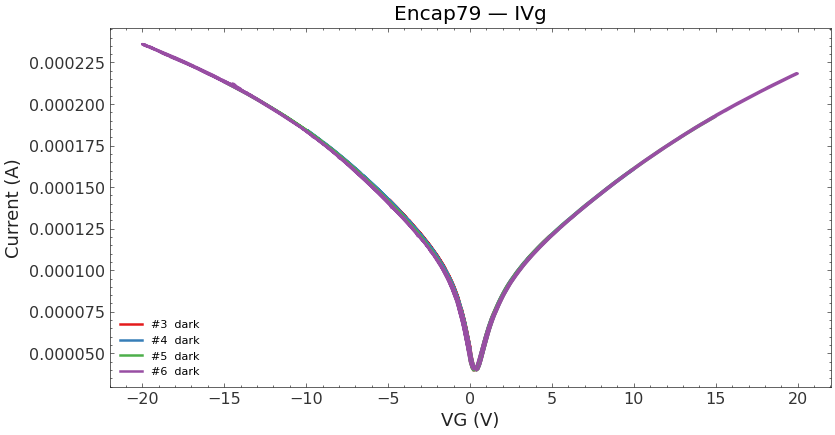

In [2]:
METADATA_CSV = "Alisson_04_sept_metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 79.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem
good_ivgs = [3,4,5,6]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

saved figs/Encap79_IVg_sequence_Alisson_04_sept_metadata.png


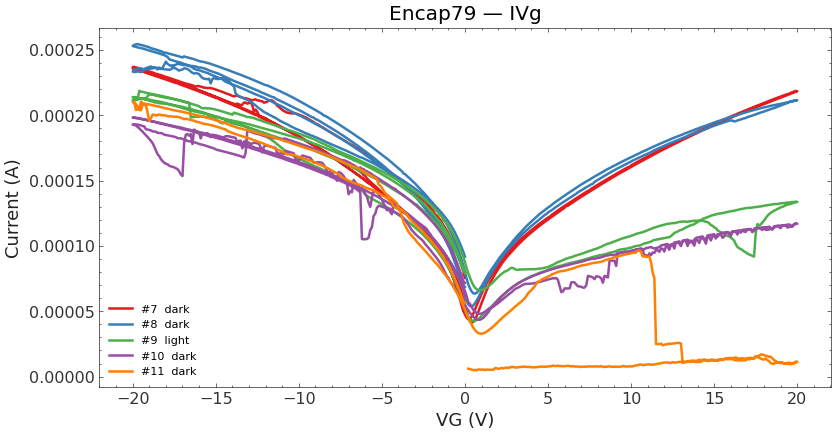

In [3]:
good_ivgs = [7,8,9,10,11]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

In [4]:
METADATA_CSV = "Alisson_04_sept_metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 71.0  
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
bad_its = [3,10]
meta_no_bad = meta.filter(~((pl.col("proc") == "ITS") & (pl.col("file_idx").is_in(bad_its))))
# A tag to help separate different metadata files/folders in outputs
tag = Path(METADATA_CSV).stem

saved figs/Encap71_IVg_sequence_Alisson_04_sept_metadata.png


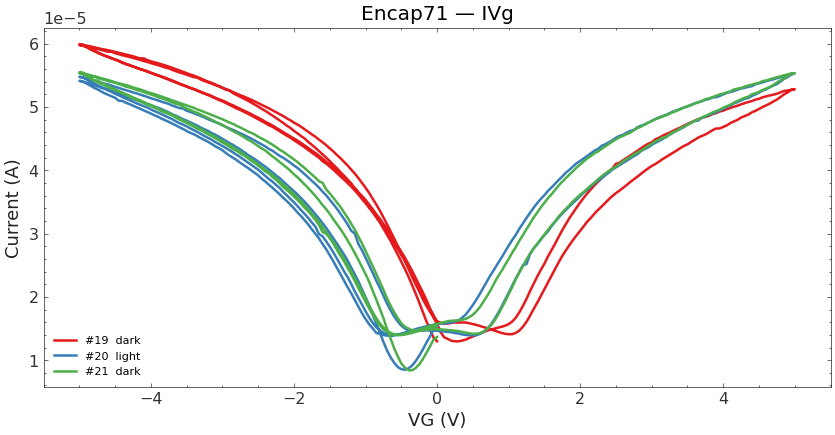

In [5]:
good_ivgs = [19,20,21]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 
#plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap71_IVg_sequence_Alisson_04_sept_metadata.png


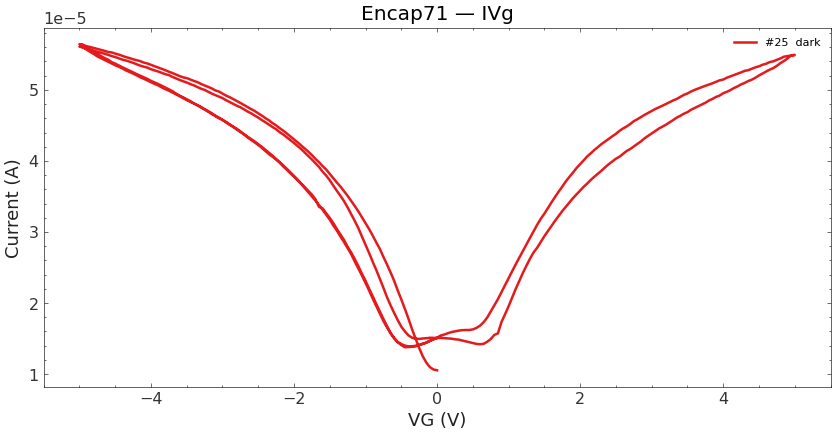

In [6]:
good_ivgs = [25]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

saved figs/chip71_ITS_overlay_Vgm2p0_455nm_Alisson_04_sept_metadata.png


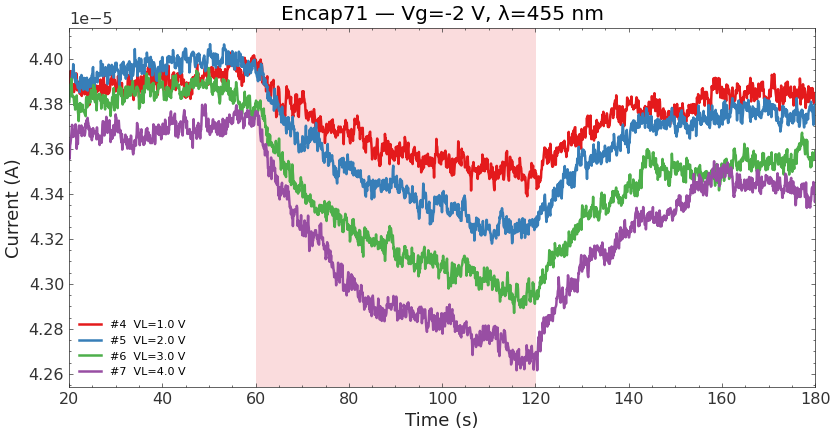

In [7]:


# then use meta_no_bad everywhere you plot ITS
plot_its_by_vg(meta_no_bad, BASE_DIR, tag, vgs=[-2.0], wavelengths=[455.0])    # or all Vg 

saved figs/Encap71_IVg_sequence_Alisson_04_sept_metadata.png


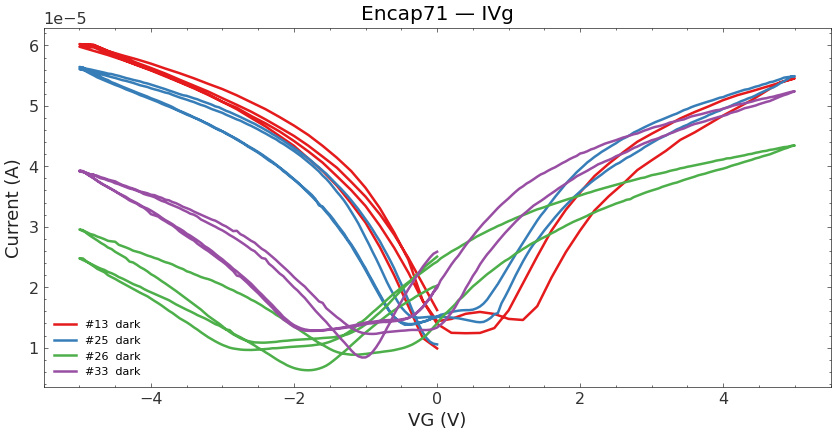

In [8]:
good_ivgs = [13, 25, 26, 33]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

saved figs/chip71_ITS_overlay_Vgm2p0_455nm_Alisson_04_sept_metadata.png


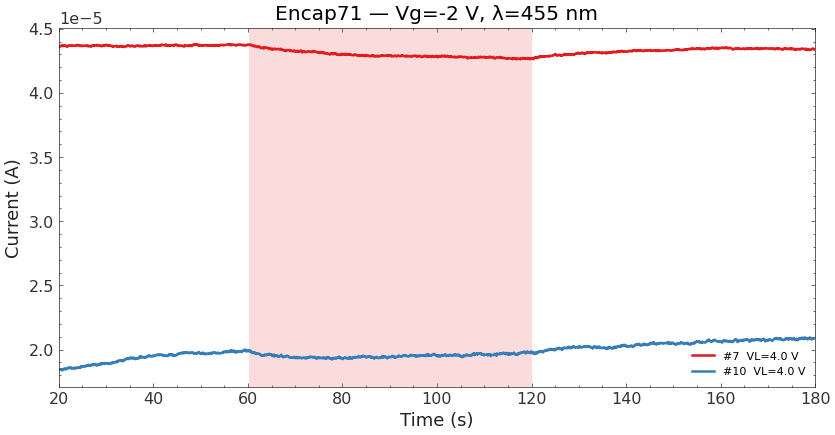

In [9]:
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
bad_its = [3,4,5,6]
meta_no_bad = meta.filter(~((pl.col("proc") == "ITS") & (pl.col("file_idx").is_in(bad_its))))
# A tag to help separate different metadata files/folders in outputs
tag = Path(METADATA_CSV).stem

# then use meta_no_bad everywhere you plot ITS
plot_its_by_vg(meta_no_bad, BASE_DIR, tag, vgs=[-2.0], wavelengths=[455.0])    # or all Vg 

saved figs/Chip71_IVg_last_day1_first_day2_Alisson_04_sept_metadata_vs_Alisson_05_sept_metadata.png


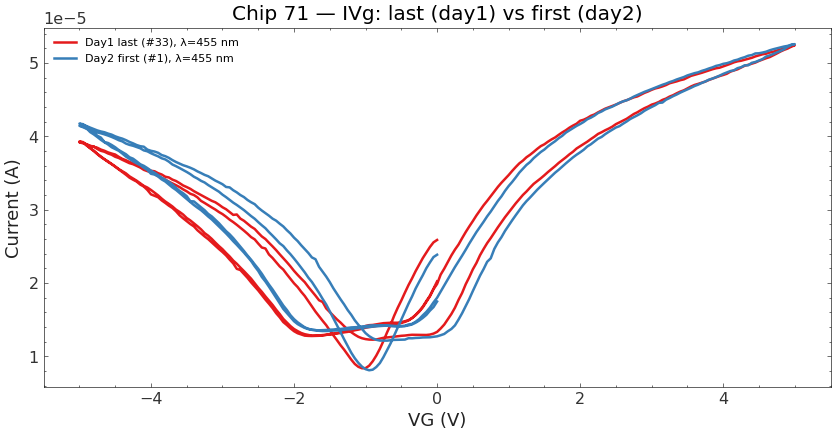

In [10]:
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt
from src.plots import _read_measurement

    
# Day 1
CSV1 = "Alisson_04_sept_metadata.csv"
BASE1 = Path(".")
meta1 = load_and_prepare_metadata(CSV1, CHIP_NUMBER)

# Day 2
CSV2 = "Alisson_05_sept_metadata.csv"
BASE2 = Path(".")
meta2 = load_and_prepare_metadata(CSV2, CHIP_NUMBER)

tag = f"{Path(CSV1).stem}_vs_{Path(CSV2).stem}"

plot_ivg_last_of_day1_vs_first_of_day2(meta1, meta2, BASE1, BASE2, tag)


saved figs/chip71_ITS_overlay_Vgm3p0_455nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg3p0_455nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vgm5p0_455nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg5p0_455nm_Alisson_05_sept_metadata.png


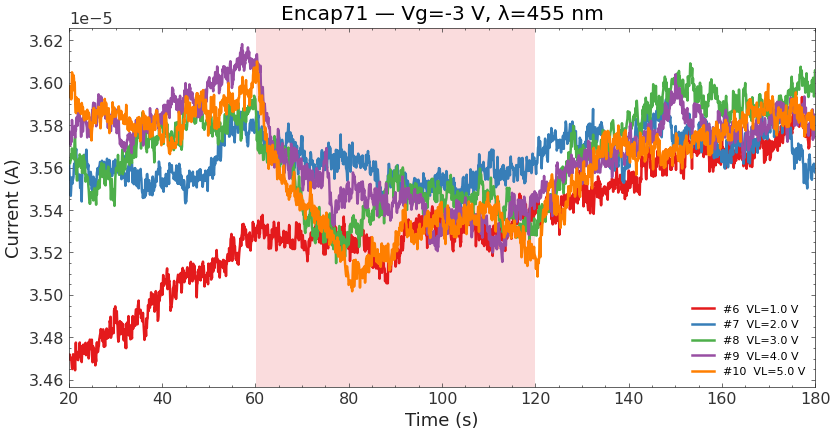

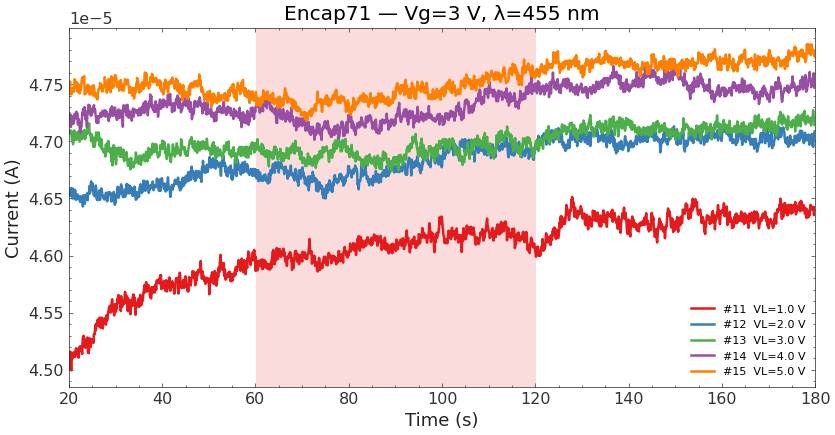

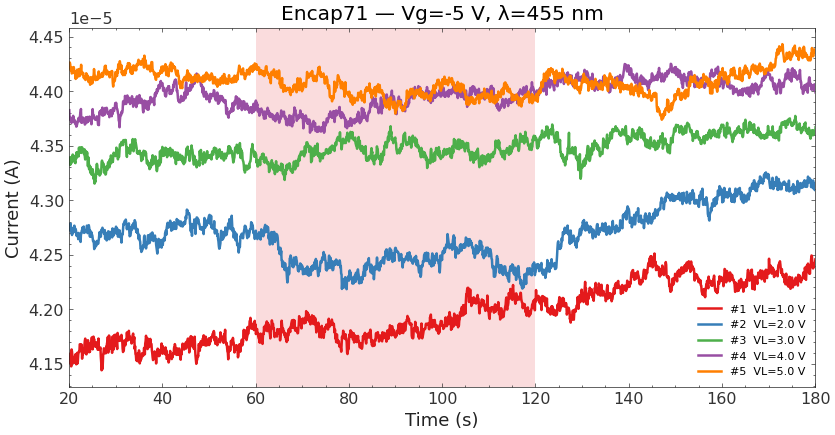

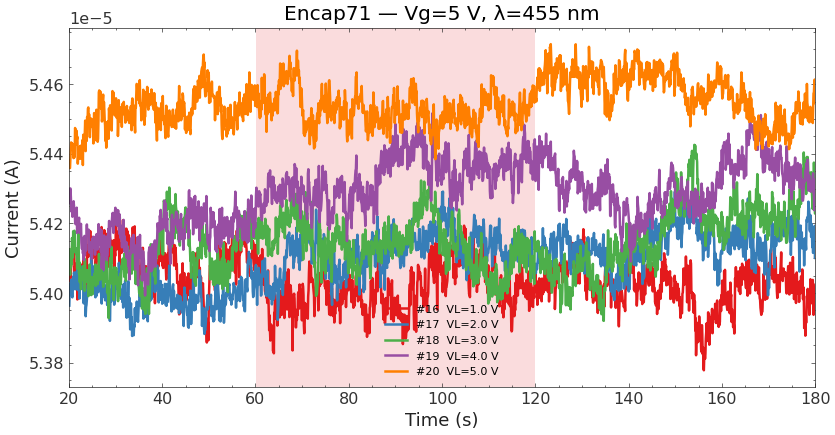

In [11]:
METADATA_CSV = "Alisson_05_sept_metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 71.0  

meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)

tag = Path(METADATA_CSV).stem
# then use meta_no_bad everywhere you plot ITS
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-3.0], wavelengths=[455.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[3.0], wavelengths=[455.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-5.0], wavelengths=[455.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[5.0], wavelengths=[455.0])  

saved figs/chip71_ITS_overlay_Vgm3p0_365nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg3p0_365nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vgm5p0_365nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg5p0_365nm_Alisson_05_sept_metadata.png


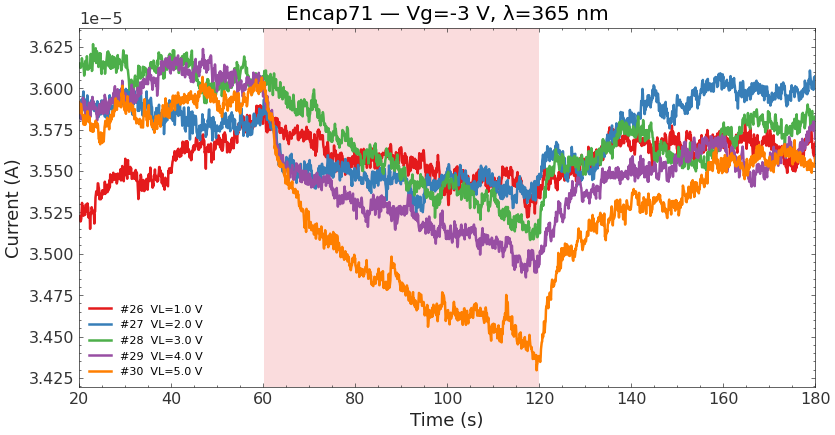

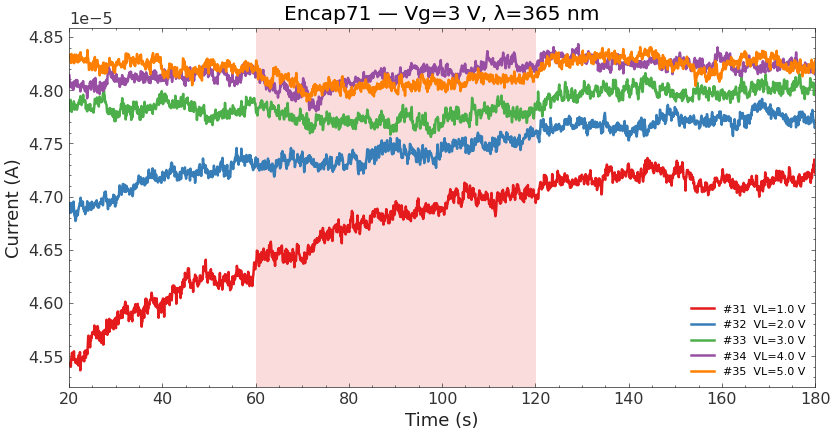

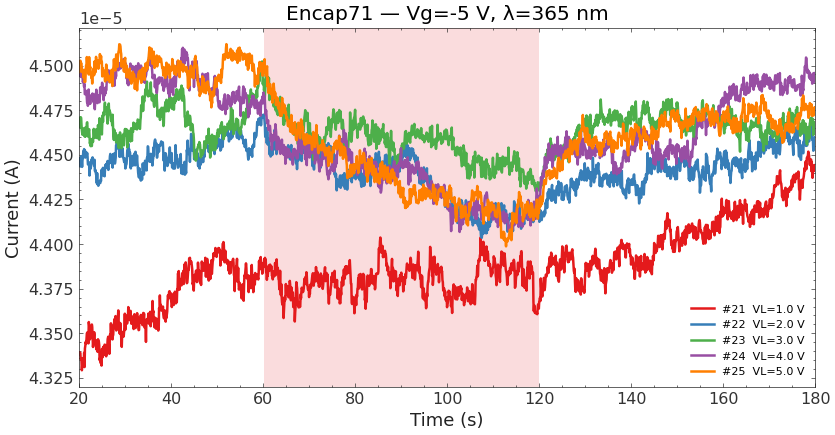

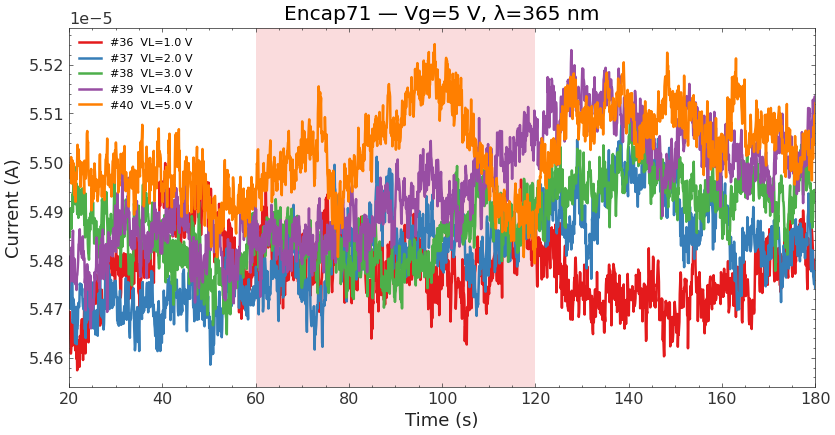

In [12]:
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-3.0], wavelengths=[365.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[3.0], wavelengths=[365.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-5.0], wavelengths=[365.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[5.0], wavelengths=[365.0])

saved figs/Encap71_IVg_sequence_Alisson_05_sept_metadata.png


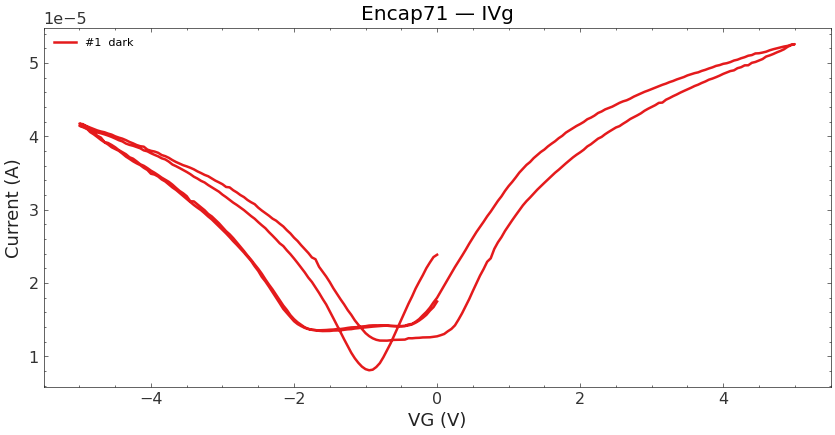

In [13]:
good_ivgs = [1]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag)

saved figs/Encap67_IVg_sequence_Alisson_08_sept_metadata.png


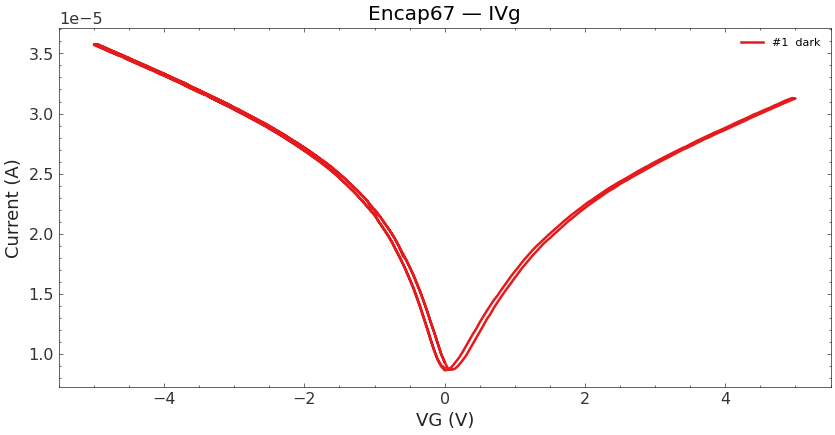

In [15]:
METADATA_CSV = "Alisson_08_sept_metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 67.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap72_IVg_sequence_Alisson_08_sept_metadata.png


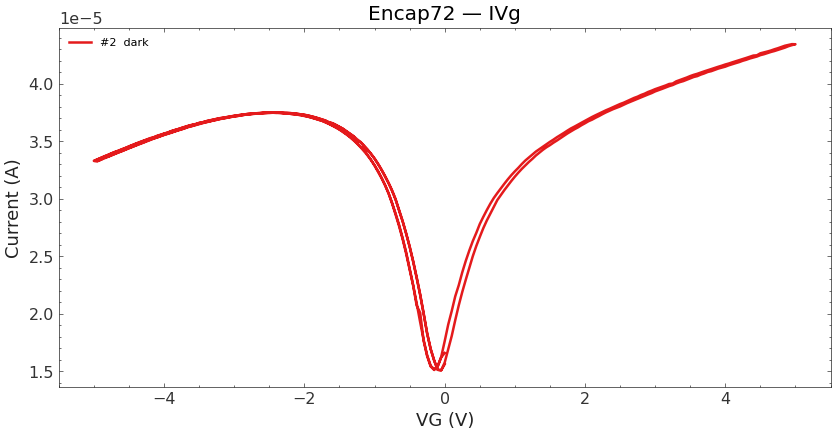

In [16]:
CHIP_NUMBER  = 72.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap68_IVg_sequence_Alisson_08_sept_metadata.png


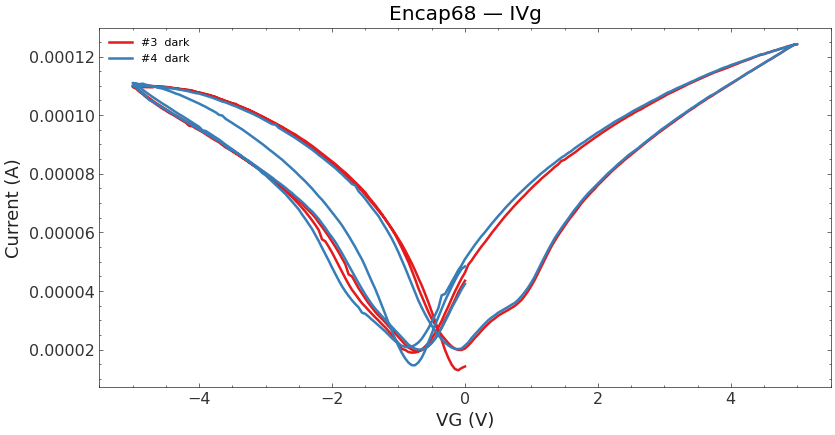

In [17]:
CHIP_NUMBER  = 68.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap69_IVg_sequence_Alisson_08_sept_metadata.png


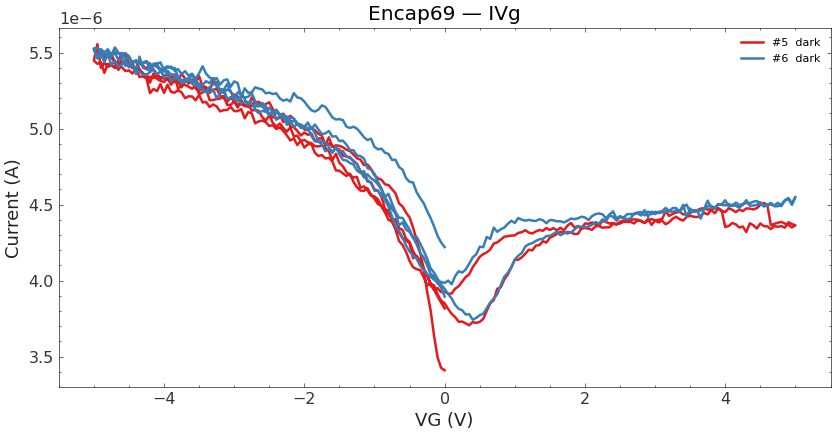

In [18]:
CHIP_NUMBER  = 69.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap73_IVg_sequence_Alisson_08_sept_metadata.png


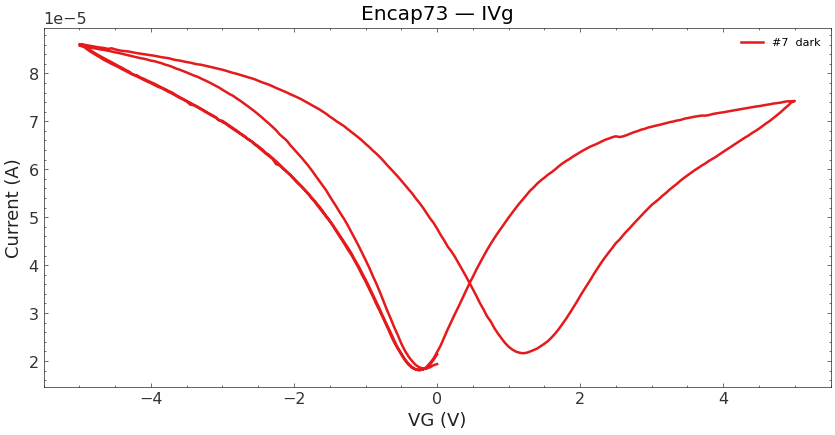

In [20]:
CHIP_NUMBER  = 73.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap74_IVg_sequence_Alisson_08_sept_metadata.png


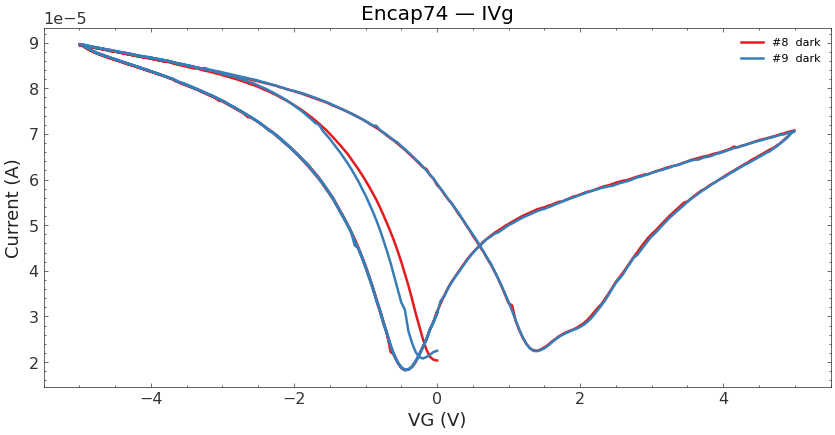

In [21]:
CHIP_NUMBER  = 74.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap75_IVg_sequence_Alisson_08_sept_metadata.png


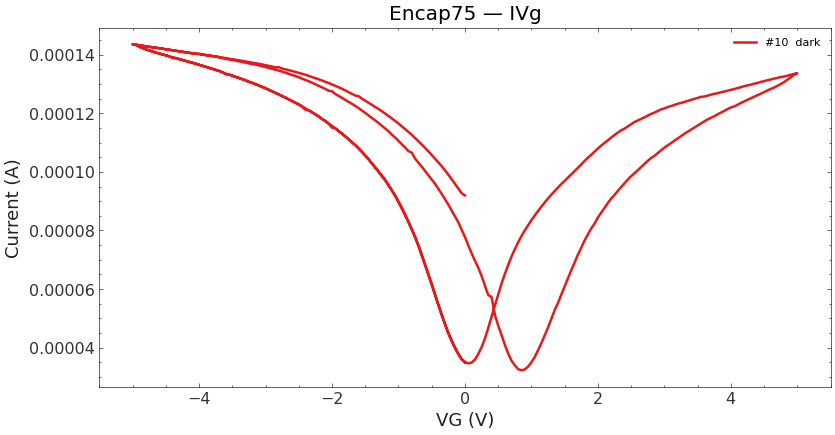

In [22]:
CHIP_NUMBER  = 75.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap76_IVg_sequence_Alisson_08_sept_metadata.png


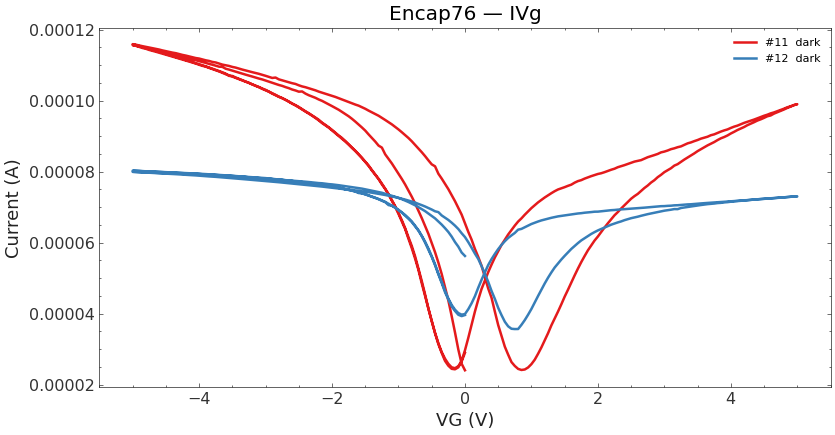

In [23]:
CHIP_NUMBER  = 76.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap80_IVg_sequence_Alisson_08_sept_metadata.png


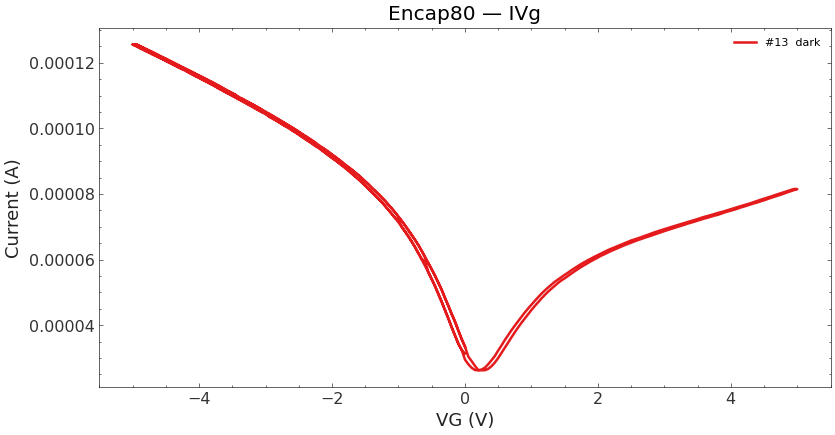

In [25]:
CHIP_NUMBER  = 80.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap81_IVg_sequence_Alisson_08_sept_metadata.png


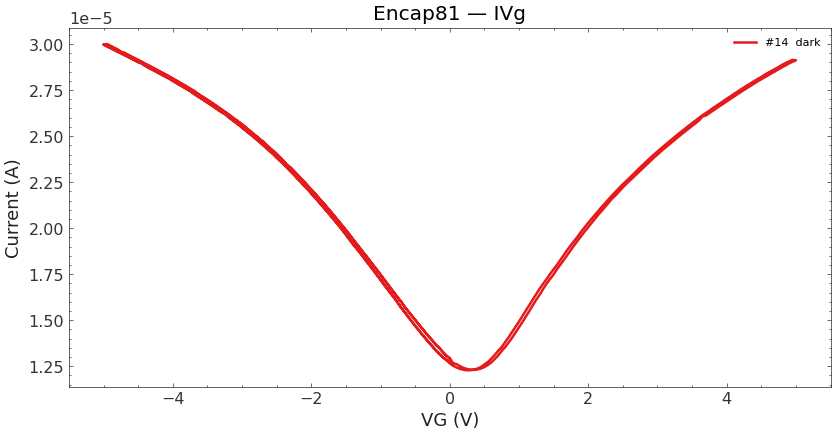

In [26]:
CHIP_NUMBER  = 81.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap100_IVg_sequence_Alisson_08_sept_metadata.png


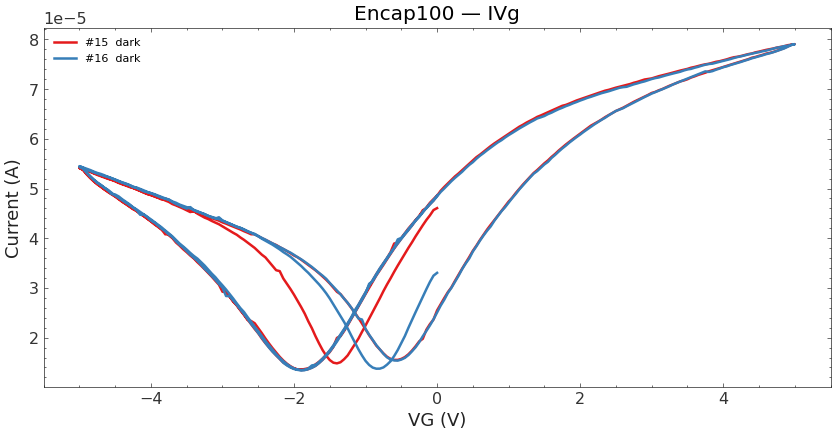

In [27]:
CHIP_NUMBER  = 100.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap101_IVg_sequence_Alisson_08_sept_metadata.png


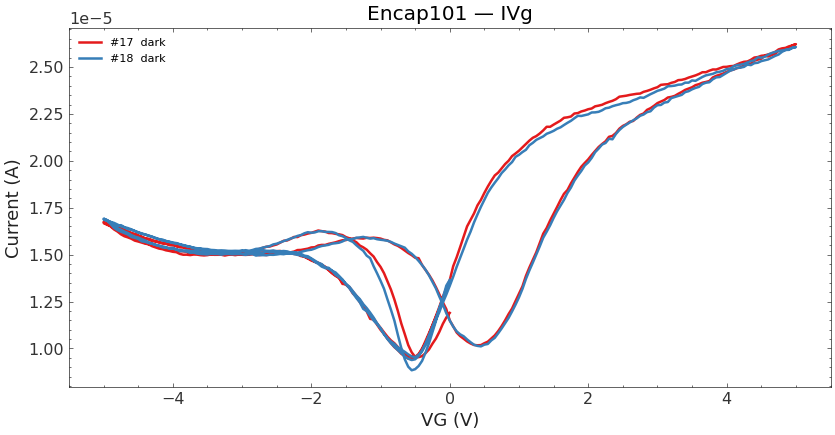

In [28]:
CHIP_NUMBER  = 101.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag) 